<h2>Index</h2>
<b><ol>1 Data Collection<br>
    2 Data Understanding<br>
      <ol>2.1 Statistics<br>
      2.2 Exploration<br>
          2.3 Missing Values Assessment</ol>
    3 Data Preparation<br>
      <ol>3.1 Missing Values Replacement<br>
      3.2 Feature Engineering<br>
      <ol>
          3.2.1 Conversion from Categorical Values to Numerical Values<br>
          3.2.2 One Hot Encoding<br>
          3.2.3 Feature Selection
      </ol></ol>
    4 Data Modeling
      <ol>4.1 Random Forest<br>
      4.2 K-Nearest Neighbors<br>
      4.3 Decision Tree<br>
      4.4 Support Vector Machine<br>
      </ol>
    5 Model Evaluation<br>
    6 Report
</ol></b>

<h3>1. Data Collection</h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [2]:
train = pd.read_csv('../train.csv')
test = pd.read_csv('../test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<h3>2. Data Understanding</h3>

<h4>2.1 Statistics</h4>

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [8]:
test.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008211
Pclass,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,-0.577147,0.337932,0.171539,0.230046,1.000000


<h4>2.2 Exploration</h4>

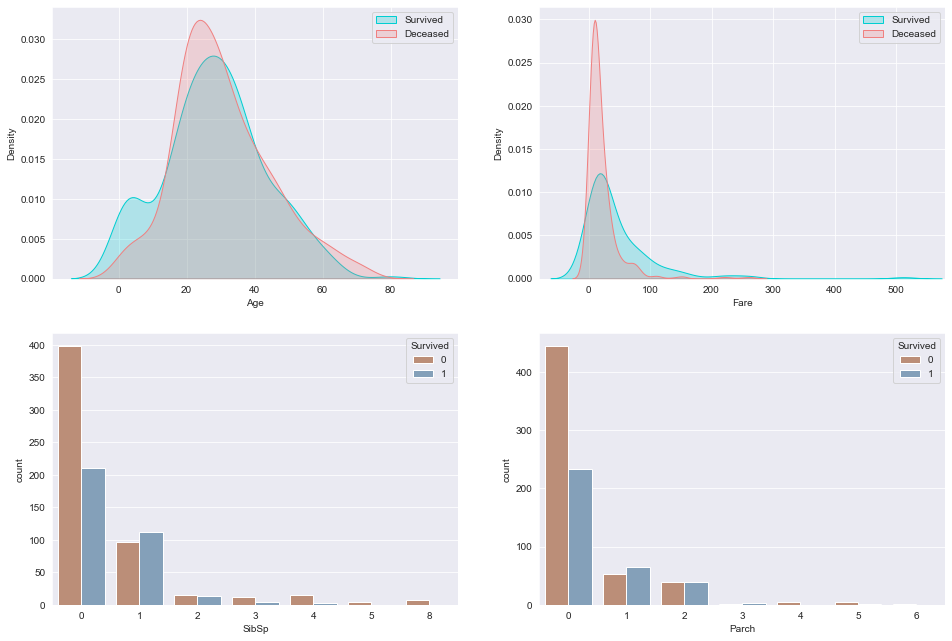

In [9]:
sns.set_style(style="darkgrid")
f, axes = plt.subplots(2, 2, figsize=(16,11))

sns.kdeplot(train['Age'][train.Survived == 1], color="darkturquoise", shade=True, ax=axes[0, 0])
sns.kdeplot(train['Age'][train.Survived == 0], color="lightcoral", shade=True, ax=axes[0, 0])
axes[0,0].legend(['Survived', 'Deceased'])

sns.kdeplot(train['Fare'][train.Survived == 1], color="darkturquoise", shade=True, ax=axes[0, 1])
sns.kdeplot(train['Fare'][train.Survived == 0], color="lightcoral", shade=True, ax=axes[0, 1])
axes[0,1].legend(['Survived', 'Deceased'])
axes[0,1].set(xlim=(-80, 580))

sns.countplot(x='SibSp', hue='Survived', palette="twilight_shifted_r", data=train, ax=axes[1, 0])
axes[1,0].legend(title='Survived', loc='upper right')

sns.countplot(x='Parch', hue='Survived', palette="twilight_shifted_r", data=train, ax=axes[1, 1])
axes[1,1].legend(title='Survived', loc='upper right')

plt.savefig('exploration1.png')

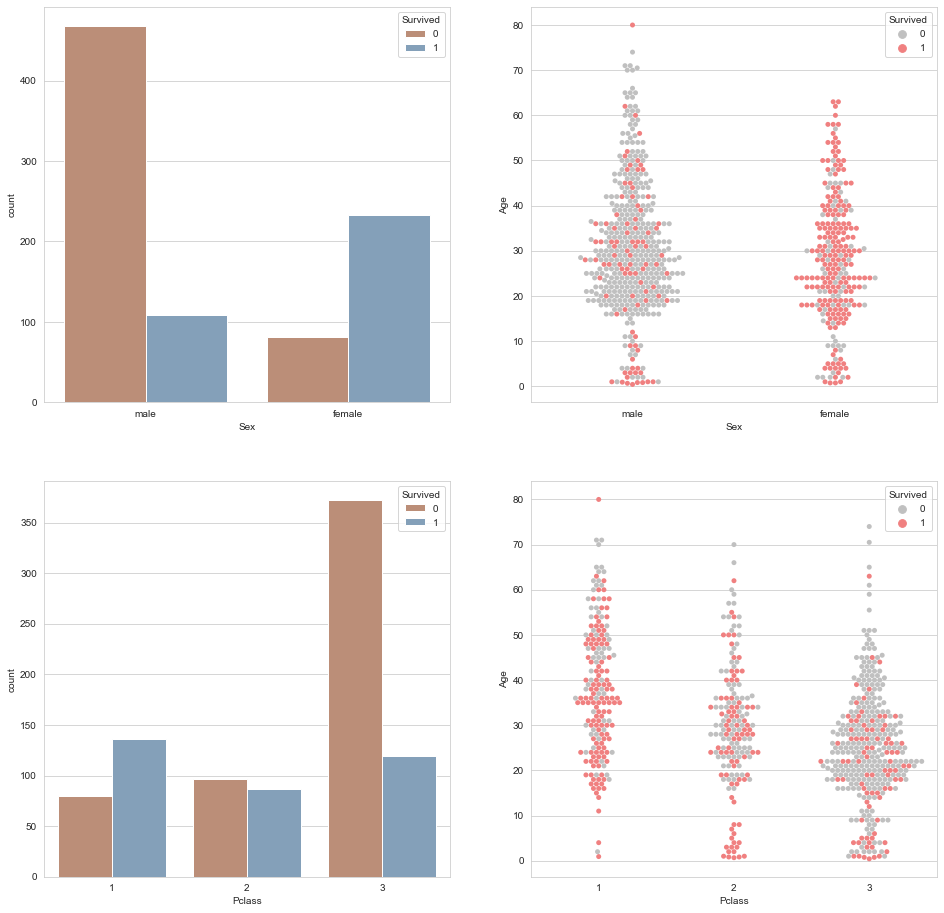

In [10]:
sns.set_style(style="whitegrid")

f, axes = plt.subplots(2, 2, figsize=(16,16))

sns.countplot(x= 'Sex', hue='Survived', palette="twilight_shifted_r", data=train, ax=axes[0, 0])

sns.swarmplot(x="Sex", y="Age", hue="Survived", palette={0:'silver',1:'lightcoral'}, data=train, ax=axes[0, 1])

sns.countplot(x= 'Pclass', hue='Survived', palette="twilight_shifted_r", data=train, ax=axes[1, 0])

sns.swarmplot(x="Pclass", y="Age", hue="Survived", palette={0:'silver',1:'lightcoral'}, data=train, ax=axes[1, 1])

plt.savefig('exploration2.png')

<h4>2.3 Missing Value Assessment</h4>

In [11]:
print("In Train dataset:")
a = train['Age'].isnull().sum()
b = train['Age'].isnull().sum()/len(train.index)
print("Feature Age Missing Values: " + str(a) + " (" + "{:.2%}".format(b) + ")")

a = train['Embarked'].isnull().sum()
b = train['Embarked'].isnull().sum()/len(train.index)
print("Feature Embarked Missing Values: " + str(a) + " (" + "{:.2%}".format(b) + ")")

print("In Test dataset:")
a = test['Age'].isnull().sum()
b = test['Age'].isnull().sum()/len(test.index)
print("Feature Age Missing Values: " + str(a) + " (" + "{:.2%}".format(b) + ")")

a = test['Fare'].isnull().sum()
b = test['Fare'].isnull().sum()/len(test.index)
print("Feature Fare Missing Values: " + str(a) + " (" + "{:.2%}".format(b) + ")")

In Train dataset:
Feature Age Missing Values: 177 (19.87%)
Feature Embarked Missing Values: 2 (0.22%)
In Test dataset:
Feature Age Missing Values: 86 (20.57%)
Feature Fare Missing Values: 1 (0.24%)


<h3>3. Data Preparation</h3>

<h4>3.1 Missing Value Replacement</h4>

In [12]:
datasets = [train, test]

for df in datasets:

    # Age - replace randomly within std
    df['Age'][np.isnan(df['Age'])] = np.random.randint(df['Age'].mean() - df['Age'].std(), df['Age'].mean() + df['Age'].std(), 
                                                                     size=df['Age'].isnull().sum())
    
    # Fare - replace with median
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())

    # Embarked - replace with mode
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

<h4>3.2 Features Engineering</h4>

<h5>3.2.1 Conversion from Categorical Values to Numerical Values</h5>

In [13]:
for df in datasets:

    # Sex - 0 if female, 1 if male
    df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

    # IsAlone - from SibSp and Parch, 0 if NOT alone, 1 if alone
    df['Family'] = df['SibSp'] + df['Parch']
    df['IsAlone'] = df['Family'].apply(lambda x:0 if x != 0 else 1)
    
    # Cabin - 0 if NaN(passenger does NOT have cabin), 1 if a value(passenger has cabin)
    df['Cabin'] = df['Cabin'].notnull().astype(int)

<h5>3.2.2 One Hot Encoding</h5>

In [14]:
# Feature Pclass - 3 dummy variables for class 1, class 2, class 3
train = pd.concat([train,pd.get_dummies(train['Pclass'])], axis=1)
# Feature Embarked - 3 dummy variables for C(Cherbourg), Q(Queenstown), S(Southampton)
train = pd.concat([train,pd.get_dummies(train['Embarked'])], axis=1)

test = pd.concat([test,pd.get_dummies(test['Pclass'])], axis=1)
test = pd.concat([test,pd.get_dummies(test['Embarked'])], axis=1)

# rename dummy variables
train = train.rename(columns={1: "Pclass_1", 2: "Pclass_2", 3:"Pclass_3", "C":"Embarked_C", "Q":"Embarked_Q", "S":"Embarked_S"})
test = test.rename(columns={1: "Pclass_1", 2: "Pclass_2", 3:"Pclass_3", "C":"Embarked_C", "Q":"Embarked_Q", "S":"Embarked_S"})

<h5>3.2.3 Feature Selection</h5>

In [15]:
Feature = ['Sex', 'Age', 'Fare', 'Cabin', 'IsAlone', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

X = train[Feature]
for_prediction = test[Feature]

X[0:5]

,Sex,Age,Fare,Cabin,IsAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,22.0,7.2500,0,0,0,0,1,0,0,1
1,0,38.0,71.2833,1,0,1,0,0,1,0,0
2,0,26.0,7.9250,0,1,0,0,1,0,0,1
3,0,35.0,53.1000,1,0,1,0,0,0,0,1
4,1,35.0,8.0500,0,1,0,0,1,0,0,1


In [16]:
y = train['Survived'].values

y[0:5]

array([0, 1, 1, 1, 0], dtype=int64)

<h3>4. Data Modeling</h3>

In [17]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (712, 11) (712,)
Test set: (179, 11) (179,)


In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
for_prediction = sc.transform(for_prediction)

<h4>4.1 Random Forest</h4>

In [19]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf

RandomForestClassifier()

<h4>4.2 K-Nearest Neighbors</h4>

In [20]:
# find the best k and its accuracy
K = 10
accuracy = np.zeros((K-1))
for n in range(1,K):
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = knn.predict(X_test)
    accuracy[n-1] = metrics.accuracy_score(y_test,yhat)
print(accuracy)
print( "The best accuracy was with", accuracy.max(), "with k=", accuracy.argmax()+1) 

[0.78212291 0.82681564 0.81564246 0.8547486  0.84916201 0.84916201
 0.83240223 0.83798883 0.81005587]
The best accuracy was with 0.8547486033519553 with k= 4


In [21]:
k = 4
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)
knn

KNeighborsClassifier(n_neighbors=4)

<h4>4.3 Decision Tree</h4>

In [22]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dt.fit(X_train, y_train)
dt

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<h4>4.4 Support Vector Machine</h4>

In [23]:
svm = svm.SVC()
svm.fit(X_train, y_train)
svm

SVC()

<h3>5. Model Evaluation</h3>

In [24]:
# F1 score is used for evaluation

# Random Forest
y_pred = rf.predict(X_test)
rf_score = f1_score(y_test, y_pred, average='weighted')

# KNN
y_pred = knn.predict(X_test)
knn_score = f1_score(y_test, y_pred, average='weighted')

# Decision Tree
y_pred = dt.predict(X_test)
dt_score = f1_score(y_test, y_pred, average='weighted')

# SVM
y_pred = svm.predict(X_test)
svm_score = f1_score(y_test, y_pred, average='weighted')

In [25]:
models = pd.DataFrame({
    'Model': ['Random Forest', 'K-Nearest Neighbors', 'Decision Tree', 'Support Vector Machine'],
    'Score': [rf_score, knn_score, dt_score, svm_score]})
models = models.sort_values(by='Score', ascending=False).reset_index(drop=True)
models

,Model,Score
0,Random Forest,0.852712
1,K-Nearest Neighbors,0.847039
2,Support Vector Machine,0.840550
3,Decision Tree,0.835273


<h3>6. Report</h3>

In [29]:
# prediction on test dataset with the model with highest evaluation score
prediction = rf.predict(for_prediction)

In [30]:
submission = pd.DataFrame({
        "PassengerId": test['PassengerId'],
        "Survived": prediction
    })
submission.to_csv('submission.csv', index=False)
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [31]:
print("Survival Rate of Actual Data: " + str((train['Survived'] == 1).sum()/len(train.index)) + 
      "\nSurvival Rate of Prediction: " + str((submission['Survived'] == 1).sum()/len(submission.index)))

Survival Rate of Actual Data: 0.3838383838383838
Survival Rate of Prediction: 0.35406698564593303
